The data for this project is from the [Survey of Consumer Finances](https://www.federalreserve.gov/econres/scfindex.htm) (SCF). The SCF is a survey sponsored by the US Federal Reserve. It tracks financial, demographic, and opinion information about families in the United States. The survey is conducted every three years, and I'll work with an extract of the results from 2019.

In [8]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

%matplotlib inline
plt.style.use('seaborn')

In [3]:
df = pd.read_csv(r"C:\Users\USER\Documents\Project_setup\WorldQuant\Project_6\data\scfp2019excel.zip")
print("df shape:", df.shape)
df.head()

df shape: (28885, 351)


,YY1,Y1,WGT,HHSEX,AGE,AGECL,EDUC,EDCL,MARRIED,KIDS,...,NWCAT,INCCAT,ASSETCAT,NINCCAT,NINC2CAT,NWPCTLECAT,INCPCTLECAT,NINCPCTLECAT,INCQRTCAT,NINCQRTCAT
0,1,11,6119.779308,2,75,6,12,4,2,0,...,5,3,6,3,2,10,6,6,3,3
1,1,12,4712.374912,2,75,6,12,4,2,0,...,5,3,6,3,1,10,5,5,2,2
2,1,13,5145.224455,2,75,6,12,4,2,0,...,5,3,6,3,1,10,5,5,2,2
3,1,14,5297.663412,2,75,6,12,4,2,0,...,5,2,6,2,1,10,4,4,2,2
4,1,15,4761.812371,2,75,6,12,4,2,0,...,5,3,6,3,1,10,5,5,2,2


This dataset is HUGE — over 20,000 rows and 351 columns!  so I woukd have to filter features to explore. The [data dictionary](data_dictionary.ipynb) contains details of the dataset and links to the official is here: [Code Book](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk.htm). 

In this project, I am going to focus on households that have "been turned down for credit in the past 5 years." These households are identified in the `"TURNDOWN"` column. 

In [4]:
# Extract only Households that ahve been Turned down for credit in the last 5 years, i.e TURNDOWN == 1
mask = df["TURNDOWN"] == 1
df_turndown = df[mask] 
print("df_turndown shape:", df_turndown.shape)
df_turndown.head()

df_turndown shape: (2706, 351)


,YY1,Y1,WGT,HHSEX,AGE,AGECL,EDUC,EDCL,MARRIED,KIDS,...,NWCAT,INCCAT,ASSETCAT,NINCCAT,NINC2CAT,NWPCTLECAT,INCPCTLECAT,NINCPCTLECAT,INCQRTCAT,NINCQRTCAT
150,31,311,4730.103425,1,31,1,9,3,1,2,...,1,3,2,3,2,1,6,6,3,3
151,31,312,4741.033012,1,31,1,9,3,1,2,...,1,3,2,3,2,1,6,6,3,3
152,31,313,4733.414115,1,31,1,9,3,1,2,...,1,3,2,3,2,1,6,6,3,3
153,31,314,4732.841307,1,31,1,9,3,1,2,...,1,3,2,3,2,1,6,6,3,3
154,31,315,4740.941333,1,31,1,9,3,1,2,...,1,3,2,3,2,1,6,6,3,3


# EDA

## Age

Exploring the characteristics of this group. One of the features is `"AGE"` group (`"AGECL"`).

In [5]:
age_groups = df_turndown['AGECL'].unique()
print("Age Groups:", age_groups)

Age Groups: [1 5 2 4 3 6]


Checking the Code Book I see that `"AGECL"` represents categorical data, even though the values in the column are numeric.

![](images\age.PNG)

Hence, the need to create a version of this column that uses the actual group names.

In [6]:
agecl_dict = {
    1: "Under 35",
    2: "35-44",
    3: "45-54",
    4: "55-64",
    5: "65-74",
    6: "75 or Older",
}


age_cl = df_turndown['AGECL'].replace(agecl_dict)
age_cl.head(10)

150    Under 35
151    Under 35
152    Under 35
153    Under 35
154    Under 35
195       65-74
196       65-74
197       65-74
198       65-74
199       65-74
Name: AGECL, dtype: object

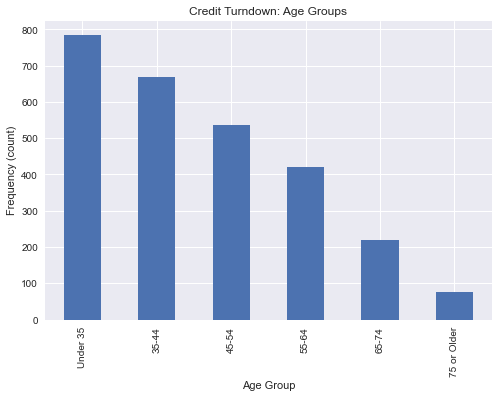

In [12]:
age_cl_value_counts = age_cl.value_counts()

# Bar plot of `age_cl_value_counts`
age_cl_value_counts.plot(
    kind="bar", 
    xlabel= "Age Group", 
    ylabel="Frequency (count)" ,
    title= "Credit Turndown: Age Groups" );

This chart is shows that many of the people who fear being denied credit are younger. But the first two age groups cover a wider range than the other four. So it might be useful to look inside those values to get a more granular understanding of the data.

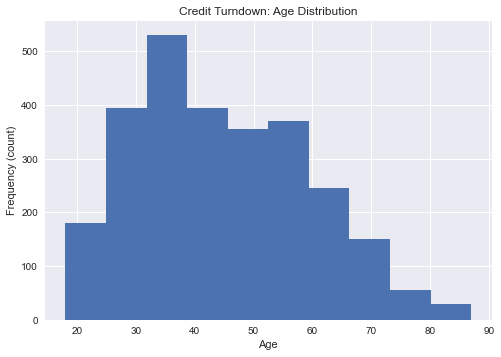

In [13]:
# Plot histogram of "AGE"
df_turndown["AGE"].hist(bins=10)
plt.xlabel("Age")
plt.ylabel("Frequency (count)")
plt.title("Credit Turndown: Age Distribution");

It looks like younger people are still more concerned about being able to secure a loan than older people, but the people who are *most* concerned seem to be between 30 and 40. 

## Race

It would be interesting to check for other features too, like race. checking [Code Book](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0001.htm#RACE) for `"RACE"`, I can see that there are 4 categories with a strange omission of `4`, this shows that the dataset does not provide acomplete picture of race in America

![](images/race.png)



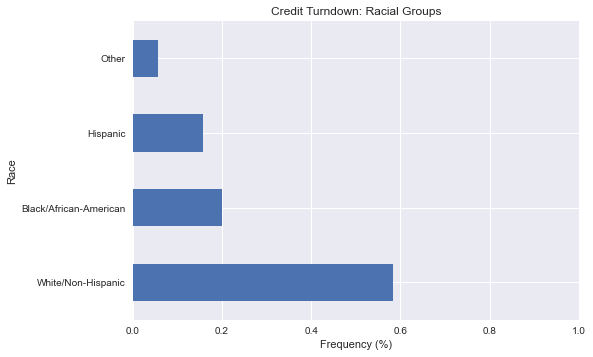

In [14]:
race_dict = {
    1: "White/Non-Hispanic",
    2: "Black/African-American",
    3: "Hispanic",
    5: "Other",
}
race = df_turndown['RACE'].replace(race_dict)
race_value_counts = race.value_counts(normalize=True)
# Create bar chart of race_value_counts
race_value_counts.plot(kind='barh')
plt.xlim((0, 1))
plt.xlabel("Frequency (%)")
plt.ylabel("Race")
plt.title("Credit Turndown: Racial Groups");

This suggests that White/Non-Hispanic people worry more about being denied credit, but thinking critically about what I am seeing, that might be because there are more White/Non-Hispanic in the population of the United States than there are other racial groups, and the sample for this survey was specifically drawn to be representative of the population as a whole.

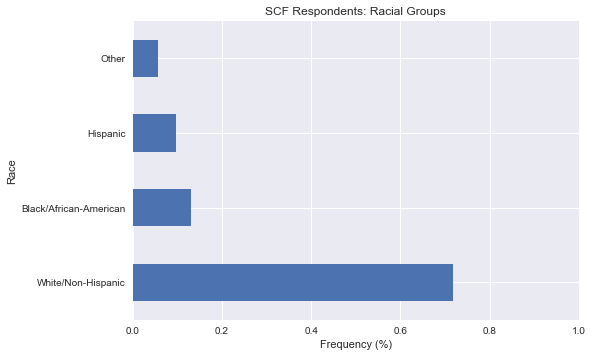

In [15]:
# Exploring the entire dataset for to balance the analysis
race = df['RACE'].replace(race_dict)
race_value_counts = race.value_counts(normalize=True)
# Create bar chart of race_value_counts
race_value_counts.plot(kind='barh')
plt.xlim((0, 1))
plt.xlabel("Frequency (%)")
plt.ylabel("Race")
plt.title("SCF Respondents: Racial Groups");

On the one hand, we can see that White Non-Hispanics account for around 70% of whole dataset, but only 58% of were turndown for credit respondents. On the other hand, Black and Hispanic respondents represent 25% of the whole dataset but 35% of credit turndown respondents. In other words, Black and Hispanic households are actually *more* likely to be turned down for credit. 

<div class="alert alert-block alert-warning">
<b>Data Ethics:</b> It's important to note that segmenting customers by race (or any other demographic group) for the purpose of lending is illegal in the United States. 
</div>

## Income

What about income level? Are people with lower incomes concerned about being denied credit, or is that something people with more money worry about? In order to answer that question, there is need to again compare the entire dataset with our subgroup using the `"INCCAT"` feature, which captures income percentile groups. 

![](images/income.png)

In [16]:
inccat_dict = {
    1: "0-20",
    2: "21-39.9",
    3: "40-59.9",
    4: "60-79.9",
    5: "80-89.9",
    6: "90-100",
}

df_inccat = (
    df["INCCAT"]
    .replace(inccat_dict)
    .groupby(df["TURNDOWN"])
    .value_counts(normalize=True)
    .rename('frequency')
    .reset_index()
    
)

df_inccat

,TURNDOWN,INCCAT,frequency
0,0,90-100,0.277627
1,0,60-79.9,0.168608
2,0,0-20,0.159555
3,0,40-59.9,0.147294
4,0,21-39.9,0.144391
5,0,80-89.9,0.102525
6,1,21-39.9,0.259793
7,1,40-59.9,0.249446
8,1,0-20,0.206948
9,1,60-79.9,0.162971


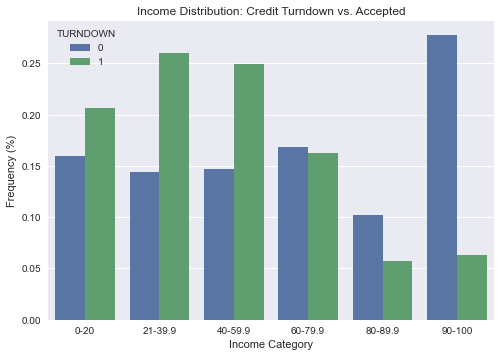

In [18]:
# Create bar chart of `df_inccat`
sns.barplot(
    data=df_inccat,
    x= "INCCAT", 
    y= "frequency", 
    hue="TURNDOWN", 
    order=inccat_dict.values()
)
plt.xlabel("Income Category")
plt.ylabel("Frequency (%)")
plt.title("Income Distribution: Credit Turndown vs. Accepted");

This shows that credit turndown households are much more common in the lower income categories. In other words, the households turned down for credit have lower incomes. 

## Assets

Calculating the correlation coefficient for `"ASSET"` and `"HOUSES"` in the whole dataset `df` inorder to understand the relationship between both faetures

In [19]:
asset_house_corr = df['ASSET'].corr(df['HOUSES'])
print("SCF: Asset Houses Correlation:", asset_house_corr)

SCF: Asset Houses Correlation: 0.5198273544779252


That's a moderate positive correlation, which we would probably expect, right? For many Americans, the value of their primary residence makes up most of the value of their total assets. What about the people in the `TURNDOWN` subset? Let's run that correlation to see if there's a difference.

In [21]:
asset_house_corr = df_turndown['ASSET'].corr(df_turndown['HOUSES'])
print("Credit Turndown: Asset Houses Correlation:", asset_house_corr)

Credit Turndown: Asset Houses Correlation: 0.7037662261830329


WOW! see the difference! This is a high positive correlation. This shows that for Americans that has been turndown for creit in the last 5 years, the value of their primary residence makes up most of the value of their total assets and the relationship between the total value of assets and the value of the primary residence is very much stronger for our `TURNDOWN` group than it is for the population as a whole. 

Let's make correlation matrices using the rest of the data for both `df` and `df_turndown` and see if the differences persist. Here, we'll look at only 5 features: `"ASSET"`, `"HOUSES"`, `"INCOME"`, `"DEBT"`, and `"EDUC"`.

In [22]:
cols = ["ASSET", "HOUSES", "INCOME", "DEBT", "EDUC"]
corr = df[cols].corr()
corr.style.background_gradient(axis=None)

,ASSET,HOUSES,INCOME,DEBT,EDUC
ASSET,1.000000,0.519827,0.622429,0.261250,0.116673
HOUSES,0.519827,1.000000,0.247852,0.266661,0.169300
INCOME,0.622429,0.247852,1.000000,0.114646,0.069400
DEBT,0.261250,0.266661,0.114646,1.000000,0.054179
EDUC,0.116673,0.169300,0.069400,0.054179,1.000000


In [23]:
corr = df_turndown[cols].corr()
corr.style.background_gradient(axis=None)

,ASSET,HOUSES,INCOME,DEBT,EDUC
ASSET,1.000000,0.703766,0.764211,0.532428,0.112795
HOUSES,0.703766,1.000000,0.481169,0.894639,0.223530
INCOME,0.764211,0.481169,1.000000,0.347624,0.157789
DEBT,0.532428,0.894639,0.347624,1.000000,0.262513
EDUC,0.112795,0.223530,0.157789,0.262513,1.000000


There are some pretty important differences here! The relationship between `"DEBT"` and `"HOUSES"` is positive for both datasets, but while the coefficient for `df` is fairly weak at 0.26, the same number for `df_turndown` is 0.89. 

This means that the value of the primary residence and the total debt held by the household is getting pretty close to being the same. This suggests that the main source of debt being carried by our `"TURNFEAR"` folks is their primary residence, which, again, is an intuitive finding. 

`"DEBT"` and `"ASSET"` share a similarly striking difference, as do `"EDUC"` and `"DEBT"` which, while not as extreme a contrast as the other, is still big enough to catch the interest of our hypothetical banker.

Let's make some visualizations to show these relationships graphically.

## Education

First, let's start with education levels `"EDUC"`, comparing credit turndown and non-credit turndown groups.

![](images/educ.png)

In [24]:
df_educ = (
    df['EDUC']
    .groupby(df['TURNDOWN'])
    .value_counts(normalize=True)
    .rename('frequency')
    .reset_index()
           
)
df_educ.head()

,TURNDOWN,EDUC,frequency
0,0,12,0.247947
1,0,8,0.200084
2,0,13,0.142137
3,0,9,0.135490
4,0,14,0.090034


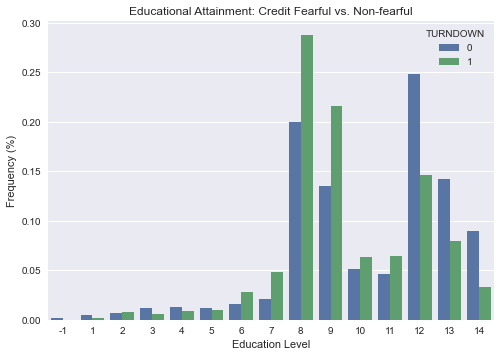

In [26]:
# Create bar chart of `df_educ`
sns.barplot(
    data = df_educ,
    x="EDUC",
    y="frequency",
    hue ='TURNDOWN'
)
plt.xlabel("Education Level")
plt.ylabel("Frequency (%)")
plt.title("Educational Attainment: Credit Fearful vs. Non-fearful");

In this plot, we can see that a much higher proportion of credit-turndown respondents have only a high school diploma, while university degrees are more common among the non-credit turndown.

## Debt

<AxesSubplot:xlabel='DEBT', ylabel='ASSET'>

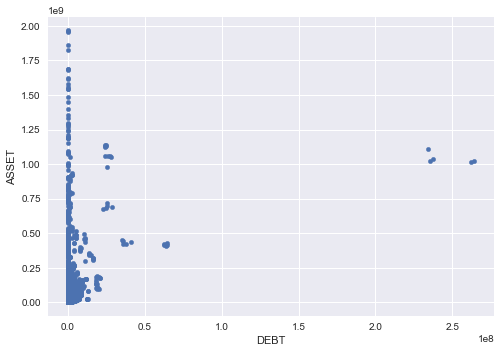

In [27]:
# Create scatter plot of ASSET vs DEBT, df
df.plot.scatter(x='DEBT', y='ASSET')

<AxesSubplot:xlabel='DEBT', ylabel='ASSET'>

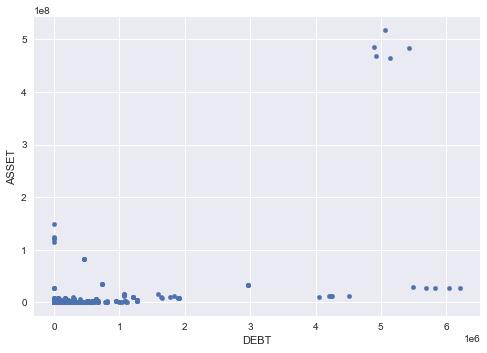

In [28]:
# Create scatter plot of ASSET vs DEBT, df_turndown
df_turndown.plot.scatter(x='DEBT',y='ASSET' )

We can see relationship in our `df_turndown` graph is flatter than the one in our `df` graph, but they clearly are different. 

I would end with the most striking difference from our matrices, and make some scatter plots showing the difference between `HOUSES` and `DEBT`.

<AxesSubplot:xlabel='DEBT', ylabel='HOUSES'>

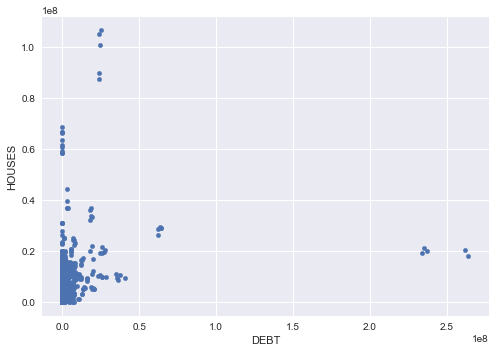

In [29]:
# Create scatter plot of HOUSES vs DEBT, df
df.plot.scatter(x='DEBT', y='HOUSES')

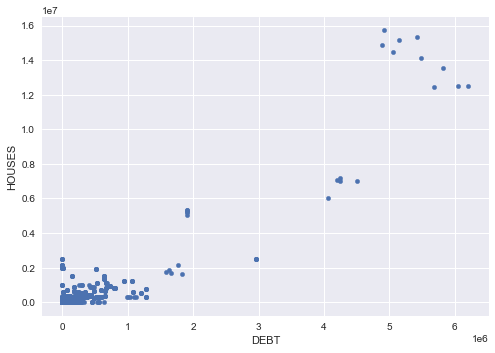

In [30]:
# Create scatter plot of ASSET vs DEBT, df_turndown
df_turndown.plot.scatter(x='DEBT',y='HOUSES' );

The outliers make it a little difficult to see the difference between these two plots, but the relationship is clear enough: our `df_turndown` graph shows an almost perfect linear relationship, while our `df` graph shows something a little more muddled. It is also noticeable that the datapoints on the `df_turndown` graph form several little groups that I can call "clusters". 